In [1]:
# 라이브러리 호출
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 시드값 고정
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [18]:
# 데이터 불러오기
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1) # 불러온 데이터에서 일부만 가져옴, frac은 0부터1까지
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5861,6.9,0.52,0.54,7.9,0.036,23.0,169.0,0.99267,3.26,0.47,12.2,6,0
1089,11.6,0.41,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,7,1
740,8.3,0.76,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,6,1
1276,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4,1
3362,7.3,0.21,0.30,10.9,0.037,18.0,112.0,0.99700,3.40,0.50,9.6,6,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3389 to 1482
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [19]:
# 데이터를 넘파이 배열로 변환, 타겟 분리
dataset = df.values
X = dataset[:,:-1].astype('float')
y = dataset[:,-1]

X.shape, y.shape

((6497, 12), (6497,))

In [21]:
# 모델 구성, 컴파일, 실행
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 1s 1ms/step - loss: 0.3149 - accuracy: 0.8596
Epoch 2/200
33/33 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9209
Epoch 3/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9337
Epoch 4/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9357
Epoch 5/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9397
Epoch 6/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.9420
Epoch 7/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9454
Epoch 8/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1493 - accuracy: 0.9457
Epoch 9/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9484
Epoch 10/200
33/33 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.9495
Epoch 11/

33/33 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9852
Epoch 84/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 0.9868
Epoch 85/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 86/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9857
Epoch 87/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9858
Epoch 88/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9861
Epoch 89/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 90/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9863
Epoch 91/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9865
Epoch 92/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9857
Epoch 93/200


33/33 [==============================] - 0s 1ms/step - loss: 0.0502 - accuracy: 0.9849
Epoch 165/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9892
Epoch 166/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9892
Epoch 167/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9894
Epoch 168/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9881
Epoch 169/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9877
Epoch 170/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0395 - accuracy: 0.9888
Epoch 171/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9878
Epoch 172/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9895
Epoch 173/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9874
Epoc

In [23]:
# 결과 출력
print(f'Accuracy : {model.evaluate(X,y)[1]:.4f}')

204/204 [==============================] - 0s 875us/step - loss: 0.0378 - accuracy: 0.9898
Accuracy : 0.9898


# 매 반복마다 모델 저장하기

In [25]:
import os

# 모델이 저장될 디렉토리 지정
Model_dir = './model'

if not os.path.exists(Model_dir):
    os.mkdir(Model_dir)

In [26]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}_{val_loss:.4f}.hdf5' # 모델 저장 경로 지정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True) # 결과가 개선될때만 저장함

In [27]:
# 모델 실행 및 저장
model.fit(X, y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 1: val_loss improved from inf to 0.03578, saving model to ./model\01_0.0358.hdf5

Epoch 2: val_loss did not improve from 0.03578

Epoch 3: val_loss did not improve from 0.03578

Epoch 4: val_loss did not improve from 0.03578

Epoch 5: val_loss did not improve from 0.03578

Epoch 6: val_loss improved from 0.03578 to 0.03575, saving model to ./model\06_0.0357.hdf5

Epoch 7: val_loss did not improve from 0.03575

Epoch 8: val_loss did not improve from 0.03575

Epoch 9: val_loss did not improve from 0.03575

Epoch 10: val_loss did not improve from 0.03575

Epoch 11: val_loss did not improve from 0.03575

Epoch 12: val_loss did not improve from 0.03575

Epoch 13: val_loss did not improve from 0.03575

Epoch 14: val_loss did not improve from 0.03575

Epoch 15: val_loss did not improve from 0.03575

Epoch 16: val_loss did not improve from 0.03575

Epoch 17: val_loss did not improve from 0.03575

Epoch 18: val_loss did not improve from 0.03575

Epoch 19: val_loss did not improve from 0.


Epoch 166: val_loss did not improve from 0.03575

Epoch 167: val_loss did not improve from 0.03575

Epoch 168: val_loss did not improve from 0.03575

Epoch 169: val_loss did not improve from 0.03575

Epoch 170: val_loss did not improve from 0.03575

Epoch 171: val_loss did not improve from 0.03575

Epoch 172: val_loss did not improve from 0.03575

Epoch 173: val_loss did not improve from 0.03575

Epoch 174: val_loss did not improve from 0.03575

Epoch 175: val_loss did not improve from 0.03575

Epoch 176: val_loss did not improve from 0.03575

Epoch 177: val_loss did not improve from 0.03575

Epoch 178: val_loss did not improve from 0.03575

Epoch 179: val_loss did not improve from 0.03575

Epoch 180: val_loss did not improve from 0.03575

Epoch 181: val_loss did not improve from 0.03575

Epoch 182: val_loss did not improve from 0.03575

Epoch 183: val_loss did not improve from 0.03575

Epoch 184: val_loss did not improve from 0.03575

Epoch 185: val_loss did not improve from 0.03575


# 과적합 여부를 그래프로 확인해보기

In [41]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.33, epochs=2000, batch_size=200, verbose=0)

In [42]:
y_vloss = history.history['val_loss'] # 검증데이터에 대한 loss 
y_acc = history.history['val_accuracy'] # 검증데이터에 대한 accuracy

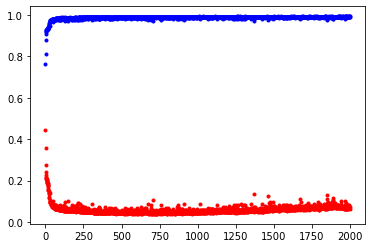

In [43]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)

# early stopping 사용

In [44]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.33, epochs=2000, batch_size=200, verbose=0, callbacks=[early_stopping_callback])

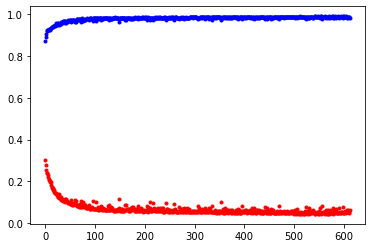

In [45]:
y_vloss = history.history['val_loss'] # 검증데이터에 대한 loss 
y_acc = history.history['val_accuracy'] # 검증데이터에 대한 accuracy
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)

In [ ]:
# 위와 비교하면 위는 빨간 선(val_loss)이 다시 올라가는것처럼 보이지만 아래에서는 다시 증가하는 경향이 보이지 않는다